## Problem Statement: 
The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the 60,000 examples, and a test set of 10,000 examples  

### Importing Libraries

In [121]:
### Loading Libraries
from sklearn.datasets import fetch_openml

## Data Manipulation Libraries
import pandas as pd
import numpy as np

### Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Data Pre-processing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###model building 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

### Evaluation
from sklearn import metrics
from sklearn.preprocessing import label_binarize

import warnings
warnings.filterwarnings("ignore")


### Loading dataset

In [2]:
### Loading libraries
mnist = fetch_openml('mnist_784', version=1)

In [3]:
### Inspecting the data
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
### Creating a DataFrame
mnist_data = pd.DataFrame(mnist["data"])
mnist_data["target"]= mnist["target"]

### Sanity checks

In [6]:
mnist_data.shape

(70000, 785)

In [7]:
mnist_data.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'target'],
      dtype='object', length=785)

In [8]:
mnist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: category(1), float64(784)
memory usage: 418.8 MB


In [9]:
mnist["data"].describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


It could be observed some of the columns have all the values as 0.<br>
These columns do not add any value to our model. Hence, dropping the same.

#### Dropping Redundant columns

In [10]:
### Getting the columns where max = min 
temp = (mnist["data"].describe().loc["max"]== mnist["data"].describe().loc["min"])
redundant_cols = temp[temp].index


In [11]:
mnist_data[redundant_cols].value_counts()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel83  pixel84  pixel85  pixel86  pixel112  pixel113  pixel141  pixel169  pixel477  pixel561  pixel645  pixel672  pixel673  pixel674  pixel700  pixel701  pixel702  pixel728  pixel729  pixel730  pixel731  pixel755  pixel756  pixel757  pixel758  pixel759  pixel760  pixel781  pixel782  pixel783  pixel784
0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0       0.0       0.0       0.0       0.0       0.0  

In [12]:
### Dropping these columns as they do not add much value.
mnist_data.drop(redundant_cols, axis =1 , inplace = True)

In [13]:
redundant_cols.shape

(65,)

In [14]:
mnist_data.shape

(70000, 720)

### Checking for missing values

In [15]:
mnist_data.isnull().mean().sort_values(ascending = False)

pixel13     0.0
pixel517    0.0
pixel519    0.0
pixel520    0.0
pixel521    0.0
           ... 
pixel284    0.0
pixel285    0.0
pixel286    0.0
pixel287    0.0
target      0.0
Length: 720, dtype: float64

There are no missing values in the data. Hence, no missing value imputation is required

### Checking for invalid values

In [16]:
temp = mnist_data.drop("target", axis = 1)
temp[(temp< 0) | (temp>255)].count(axis = 1).sort_values(ascending = False)

0        0
46665    0
46671    0
46670    0
46669    0
        ..
23338    0
23339    0
23340    0
23341    0
69999    0
Length: 70000, dtype: int64

The valid pixel values are in the range 0 to 255. Verified that there are no values outside the valid range.

### EDA

#### Checking for class imbalance


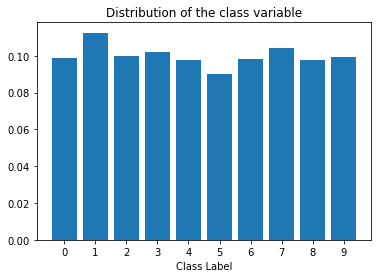

In [17]:
temp = mnist_data["target"].value_counts(normalize=True).sort_index()
plt.bar(temp.index, temp)
plt.title("Distribution of the class variable")
plt.xlabel("Class Label")
plt.show()

The classes are almost distributed uniformly. There is no imbalance in the data.

#### HeatMap

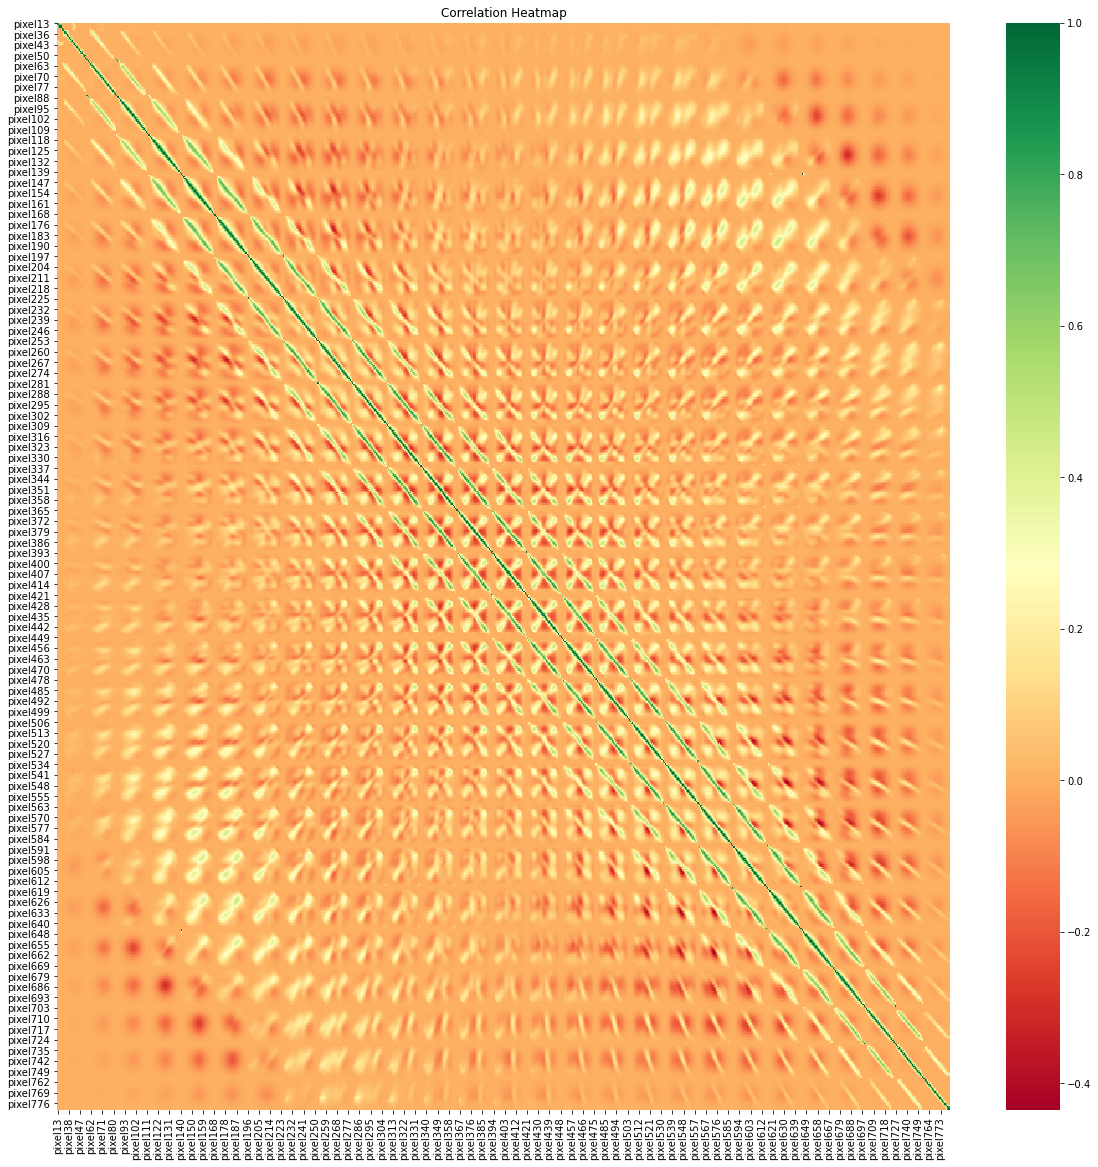

In [18]:
### Correlation between variables
plt.figure(figsize= (20,20))
sns.heatmap(mnist_data.corr(), cmap = "RdYlGn")
plt.title("Correlation Heatmap")
plt.show()

It could be observed that there are a lot of columns having multi-collinearity. <br>
It would be difficult for us to identify and drop all these variables manually as the number of variables are high.


In [19]:
mnist_data.dtypes

pixel13      float64
pixel14      float64
pixel15      float64
pixel16      float64
pixel33      float64
              ...   
pixel777     float64
pixel778     float64
pixel779     float64
pixel780     float64
target      category
Length: 720, dtype: object

In [20]:
### Since this column is categorical, converting it to int
mnist_data["target"] = mnist_data["target"].astype(int)

## Data Pre-processing

### Test Train split

In [21]:
### dividing the data into train and test splits
df_train, df_test = train_test_split(mnist_data, train_size = 60000, random_state = 42)

In [22]:
X_train = df_train.drop("target", axis = 1)
X_test = df_test.drop("target", axis = 1)
y_train = df_train["target"]
y_test = df_test["target"]

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 719), (10000, 719), (60000,), (10000,))

### Scaling

In [24]:
### Scaling the variables using StandardScaler to get a mean of zero and a variance 1.
### The formula that it uses is (x- mean) / stdev

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
df_train[df_train.columns[:-1]] = X_train_scaled
df_test[df_test.columns[:-1]] = X_test_scaled

In [26]:
df_train.describe()

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,target
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000
mean,-3.576597e-15,7.690969e-15,-1.832000e-15,-1.831526e-15,-1.924249e-15,9.324727e-16,1.117795e-15,1.315743e-15,6.239250e-16,-2.340439e-15,...,1.614331e-16,-9.109403e-16,-5.083408e-16,-1.490405e-15,1.909455e-16,-6.209866e-16,5.204457e-15,2.031726e-15,-8.359135e-17,4.449100
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,2.887545
min,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,0.000000
25%,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,2.000000
50%,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,4.000000
75%,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,7.000000
max,2.440418e+02,1.865973e+02,2.449469e+02,2.449469e+02,2.449469e+02,1.888301e+02,1.783470e+02,1.273658e+02,8.959115e+01,7.381559e+01,...,2.451813e+01,2.694897e+01,3.197990e+01,4.228713e+01,6.061654e+01,9.463578e+01,1.644101e+02,1.848916e+02,2.449469e+02,9.000000


All the independent variables now follow a mean 0 and standard deviation of 0

In [27]:
df_train["target"].value_counts().sort_index()

0    5920
1    6725
2    6023
3    6107
4    5918
5    5376
6    5915
7    6238
8    5856
9    5922
Name: target, dtype: int64

In [28]:
### Find a subset of the training set D0 and D1 which corresponds to those with label 0 and label 1 only. 
D0 = df_train[df_train["target"] == 0]
D1 = df_train[df_train["target"] == 1]


In [29]:
D0.target.value_counts(), D1.target.value_counts()

(0    5920
 Name: target, dtype: int64,
 1    6725
 Name: target, dtype: int64)

In [30]:
D0.shape, D1.shape

((5920, 720), (6725, 720))

In [31]:
D1.describe()

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,target
count,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,...,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6.725000e+03,6725.0
mean,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,1.0
std,6.843993e-16,3.721259e-16,3.053340e-16,3.053340e-16,3.062015e-16,6.436303e-16,1.072139e-15,1.767815e-15,7.060850e-16,1.592595e-15,...,4.913102e-15,5.690316e-16,4.233040e-16,3.934645e-15,1.689746e-15,1.537079e-15,1.164086e-15,9.906008e-16,3.044666e-16,0.0
min,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,1.0
25%,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,1.0
50%,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,1.0
75%,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,1.0
max,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,1.0


In [32]:
D0.describe()

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,target
count,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,...,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5920.0
mean,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,0.0
std,5.560258e-16,3.530460e-16,1.925706e-16,1.925706e-16,1.934380e-16,5.699048e-16,1.004490e-15,1.559648e-15,6.956829e-16,1.238697e-15,...,2.761913e-15,2.754974e-15,1.922236e-15,3.664045e-15,1.609959e-15,1.072150e-15,1.103377e-15,7.650777e-16,1.917031e-16,0.0
min,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,0.0
25%,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,0.0
50%,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,0.0
75%,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,0.0
max,-4.418078e-03,-5.754820e-03,-4.082517e-03,-4.082517e-03,-4.082517e-03,-6.227582e-03,-8.325767e-03,-1.090726e-02,-1.469912e-02,-1.987356e-02,...,-5.562984e-02,-5.066755e-02,-4.254171e-02,-3.272569e-02,-2.313336e-02,-1.594364e-02,-9.347431e-03,-8.247242e-03,-4.082517e-03,0.0


In [33]:
temp = pd.DataFrame(D0.mean(), columns = ["D0"])
temp["D1"] = pd.DataFrame(D1.mean())

In [34]:
temp.tail()

,D0,D1
pixel777,-0.015944,-0.015944
pixel778,-0.009347,-0.009347
pixel779,-0.008247,-0.008247
pixel780,-0.004083,-0.004083
target,0.000000,1.000000


In [35]:
temp["abs_diff"] = np.abs(temp["D0"] - temp["D1"])
temp

,D0,D1,abs_diff
pixel13,-0.004418,-0.004418,1.283695e-16
pixel14,-0.005755,-0.005755,1.908196e-17
pixel15,-0.004083,-0.004083,1.127570e-16
pixel16,-0.004083,-0.004083,1.127570e-16
pixel33,-0.004083,-0.004083,1.127570e-16
...,...,...,...
pixel777,-0.015944,-0.015944,4.649059e-16
pixel778,-0.009347,-0.009347,6.071532e-17
pixel779,-0.008247,-0.008247,2.255141e-16
pixel780,-0.004083,-0.004083,1.127570e-16


In [36]:
temp["abs_diff"].sort_values(ascending = False).head(10)

pixel407    2.128886
pixel435    2.123775
pixel359    2.054821
pixel379    2.041528
pixel387    2.020023
pixel463    1.956844
pixel358    1.952009
pixel386    1.945756
pixel331    1.936873
pixel415    1.882698
Name: abs_diff, dtype: float64

In [37]:
top10 = temp["abs_diff"].sort_values(ascending = False).head(10).index.tolist()
top10.append("target")

<b>HeatMap For Top 10 Features</b>

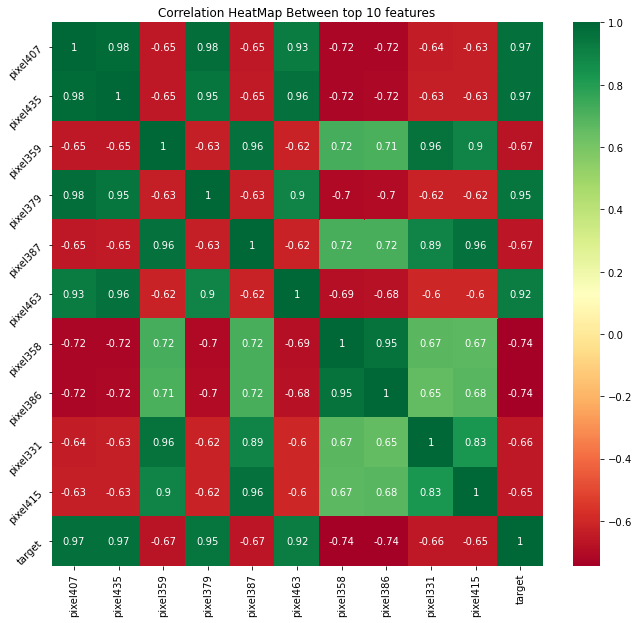

In [38]:
D0_1 = df_train[(df_train["target"] == 0) | (df_train["target"] == 1)]


plt.figure(figsize=(11,10))
sns.heatmap(D0_1[top10].corr(), cmap = "RdYlGn", annot = True)
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.title("Correlation HeatMap Between top 10 features")
plt.show()

<b>Observations:</b><br>
The top 10 features seem to highly correlated to each other i.e they have a high multi-collinearity within these variables.<br>
For fixing this 
- We can drop the variables.
- But since all of these seem to show high collinearity, we could use regularization or feature selection technique like RFE during modelling
    - By using regularization, it reduces all the co-efficients to zero or closer to 0.
    


In [39]:

mnist_data[(mnist_data["target"] == 0) |( mnist_data["target"] ==1 )][top10].corr()

,pixel407,pixel435,pixel359,pixel379,pixel387,pixel463,pixel358,pixel386,pixel331,pixel415,target
pixel407,1.000000,0.983587,-0.650121,0.977397,-0.648307,0.927677,-0.723535,-0.719606,-0.635500,-0.632718,0.971853
pixel435,0.983587,1.000000,-0.648243,0.951526,-0.646053,0.960876,-0.721711,-0.716938,-0.633840,-0.630359,0.967866
pixel359,-0.650121,-0.648243,1.000000,-0.634582,0.960367,-0.617119,0.724160,0.708113,0.956022,0.896686,-0.670884
pixel379,0.977397,0.951526,-0.634582,1.000000,-0.633489,0.899269,-0.706073,-0.703304,-0.619078,-0.618927,0.950639
pixel387,-0.648307,-0.646053,0.960367,-0.633489,1.000000,-0.616219,0.720721,0.721728,0.888880,0.960864,-0.668691
pixel463,0.927677,0.960876,-0.617119,0.899269,-0.616219,1.000000,-0.686278,-0.682473,-0.602133,-0.603121,0.921402
pixel358,-0.723535,-0.721711,0.724160,-0.706073,0.720721,-0.686278,1.000000,0.954939,0.674345,0.672558,-0.745717
pixel386,-0.719606,-0.716938,0.708113,-0.703304,0.721728,-0.682473,0.954939,1.000000,0.654476,0.682805,-0.741267
pixel331,-0.635500,-0.633840,0.956022,-0.619078,0.888880,-0.602133,0.674345,0.654476,1.000000,0.824203,-0.656068
pixel415,-0.632718,-0.630359,0.896686,-0.618927,0.960864,-0.603121,0.672558,0.682805,0.824203,1.000000,-0.651496


In [40]:
bottom10 = temp["abs_diff"].sort_values().head(10).index.tolist()
bottom10.append("target")

<b>HeatMap for Bottom 10 features</b>

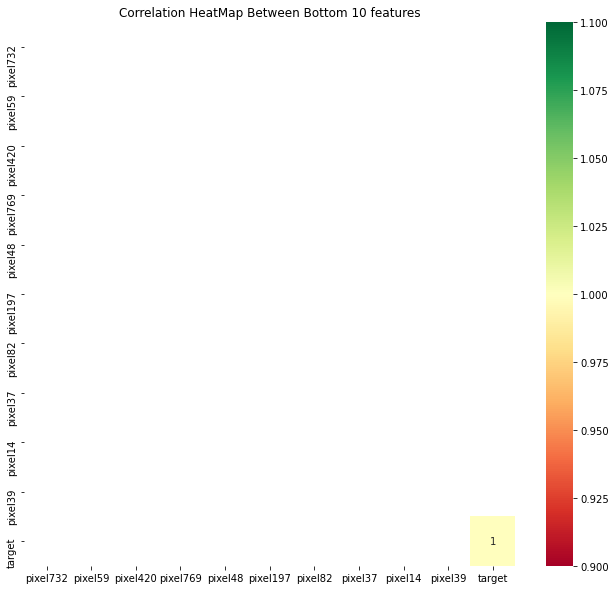

In [41]:
plt.figure(figsize=(11,10))
sns.heatmap(round(D0_1[bottom10].corr(), 2), annot = True, cmap = "RdYlGn")
plt.title("Correlation HeatMap Between Bottom 10 features")

plt.show()

In [42]:
D0_1[["pixel197", "pixel732"]].value_counts()

pixel197  pixel732
0.0       0.0         12645
dtype: int64

In [43]:
mnist_data[(mnist_data["target"] == 0) |( mnist_data["target"] ==1 )][bottom10].corr()

,pixel732,pixel59,pixel420,pixel769,pixel48,pixel197,pixel82,pixel37,pixel14,pixel39,target
pixel732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Observations</b>
- Most of these columns have very low collinearity within them.
- We could observe there are some columns with missing values 
    - correlation formula - cov(X, Y) / (sd(X) * sd(Y))
    - These columns have the value as "0" for all the rows.
    - This implies a standard deviation of 0, as there is no variance in the data.
    - Anything divides by zero - missing value


<b>Boxplot for Top 10 Features</b>

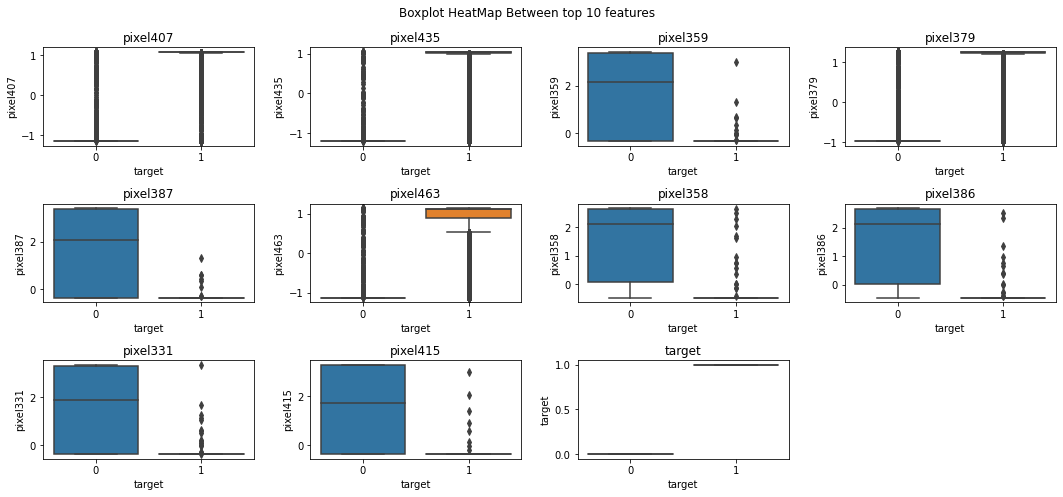

In [44]:
fig = plt.figure(figsize=(15,7))
index = 1
for column in top10:
    plt.subplot(3,4,index)
    index +=1
    sns.boxplot(D0_1["target"], D0_1[column])
    plt.title(column)
plt.suptitle("Boxplot HeatMap Between top 10 features")
fig.tight_layout()
plt.show()

<b>Observations</b>:<br>
We are observing the following cases - 
- For the pixels 407, 435, 379 and 463 - we are having high pixel values for label 1, and low pixel values for label 0.
- For the pixels 359, 387, 358, 386, 331, and 415
    - For the target label 1, 75% percentile of the data have 0 values in the columns.
    - Target label 0 has a higher median compared to target label 1.

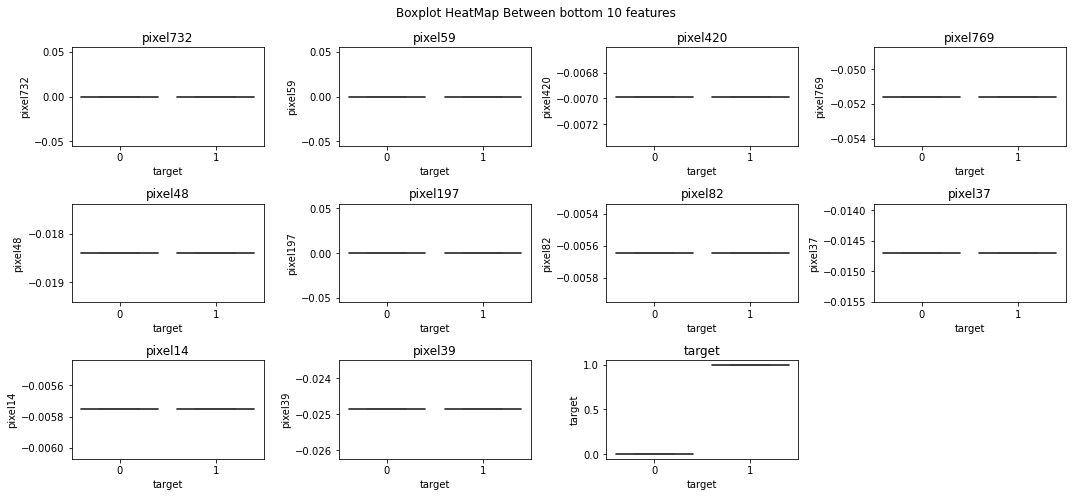

In [45]:
fig = plt.figure(figsize=(15,7))
index = 1
for column in bottom10:
    plt.subplot(3,4,index)
    index +=1
    sns.boxplot(D0_1["target"], D0_1[column])
    plt.title(column)
plt.suptitle("Boxplot HeatMap Between bottom 10 features")
fig.tight_layout()
plt.show()

<b>Observations</b>:<br>
For the bottom 10 features, we do not see a difference in the pixel values for both the labels 0 and 1.<br>
We could see approximately 75 Percentile of the data has 0 value in them, except there are a couple of outliers in few of the columns in the data

## Modelling

### Logistic Model On Scaled Features
Logistic Regression by default uses "OneVsRest" for multi-class models. so this builds a total of 10 models.

In [46]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

Since there are 700+ variables in the dataset, and most of these are multi-collinear

Hence, using Elasticnet i.e both L1 and L2 regularization as the penalty factor. So the co-efficients of variables that are not so important will be made 0 or close to 0.

In [47]:

lr_model = LogisticRegression(random_state= 32, max_iter = 3000, penalty= "elasticnet", solver = "saga", l1_ratio= 0.2)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(l1_ratio=0.2, max_iter=3000, penalty='elasticnet',
                   random_state=32, solver='saga')

In [48]:
lr_model.predict_proba(X_train_scaled)

array([[2.71170300e-07, 8.60418213e-09, 9.98923031e-01, ...,
        7.69743971e-13, 1.07492959e-03, 5.48772746e-07],
       [1.21147947e-05, 7.22528622e-05, 3.54671038e-05, ...,
        1.69682700e-04, 1.12491524e-03, 3.28714198e-03],
       [9.94363498e-01, 1.58394482e-08, 1.71952492e-04, ...,
        4.33897730e-07, 7.11981554e-04, 7.59393882e-05],
       ...,
       [5.42901770e-08, 9.91588386e-01, 3.78609761e-04, ...,
        2.94205438e-04, 5.04762022e-03, 7.73604905e-04],
       [9.99920537e-01, 1.30646438e-10, 3.03335277e-06, ...,
        1.10202097e-08, 5.86899888e-07, 1.08397817e-07],
       [9.94521443e-01, 3.27537236e-08, 1.90939565e-03, ...,
        2.95914992e-11, 4.85132349e-05, 1.43759443e-09]])

In [49]:
pd.DataFrame(lr_model.coef_)

,0,1,2,3,4,5,6,7,8,9,...,709,710,711,712,713,714,715,716,717,718
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000181,0.002173,0.004817,0.008890,0.014640,...,0.047441,0.043400,0.045244,0.036406,0.025463,0.017056,0.008891,0.002270,0.001387,0.000000
1,0.002469,0.005334,0.002111,0.002111,0.000000,0.003405,0.010583,0.015701,0.010348,0.025574,...,0.097166,0.104725,0.095211,0.064041,0.000352,0.034833,0.012869,0.006720,0.009047,0.001703
2,0.000000,0.000000,0.001011,0.001011,-0.010607,0.027506,0.035212,0.000000,-0.007585,-0.002268,...,-0.067304,-0.063480,-0.056901,-0.046770,-0.034971,-0.023032,-0.013920,-0.006818,-0.025062,0.000000
3,0.000000,-0.001116,0.000000,0.000000,0.000000,-0.001903,-0.005095,-0.008642,-0.013301,-0.019485,...,-0.076558,-0.070225,-0.076197,-0.056551,-0.040426,-0.027962,-0.017012,-0.007012,-0.008310,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.021003,-0.017766,0.000387,0.003904,...,-0.128798,-0.031281,-0.021534,0.002694,0.002193,-0.035442,-0.000296,0.000000,0.000000,0.000000
5,-0.000270,-0.002263,0.000000,0.000000,0.000000,-0.003248,-0.006840,-0.010846,-0.016298,-0.023528,...,-0.013157,-0.083352,-0.074739,-0.062627,-0.049598,-0.040120,-0.024513,-0.018423,-0.013316,-0.000284
6,0.002788,0.000000,-0.000415,-0.000415,0.015533,-0.020247,-0.000547,0.037471,0.038243,0.022435,...,0.040676,0.039689,0.036003,0.029069,0.019918,0.012011,0.006862,0.000620,0.000000,0.000000
7,0.000000,0.000086,0.000000,0.000000,0.000000,0.000424,0.002326,0.004777,0.008022,0.014278,...,0.126446,0.112725,0.060903,0.145290,0.026746,0.140225,0.007370,0.059159,-0.005881,0.037933
8,-0.004444,-0.007735,-0.003642,-0.003642,-0.003591,-0.009207,-0.014739,-0.021145,-0.030269,-0.042504,...,-0.139553,-0.132065,-0.119020,-0.098758,-0.075067,-0.053290,-0.033538,-0.016795,-0.013873,-0.003594
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.114127,0.080241,0.111301,-0.011298,0.124808,-0.011062,0.057820,-0.012423,0.061779,-0.029365


We could see that some of the variable co-efficients are converted to zero on using regularization.

In [50]:
y = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7,8,9])
ytest = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])

def plot_roc_multiclass(y, y_prob, model, train_test):
    ### this function is to get the ROC Curve for a multi-class problem.
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(10):
        fpr[i], tpr[i], _ = metrics.roc_curve(y[:, i], y_prob[:, i])
        roc_auc[i] = round(metrics.auc(fpr[i], tpr[i]), 2)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize = (12,7))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f'Label = {i}. ROC curve (area = {roc_auc[i]})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(train_test + ' ROC Curve - ' + model)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


#### Evaluating Goodness of the Fit

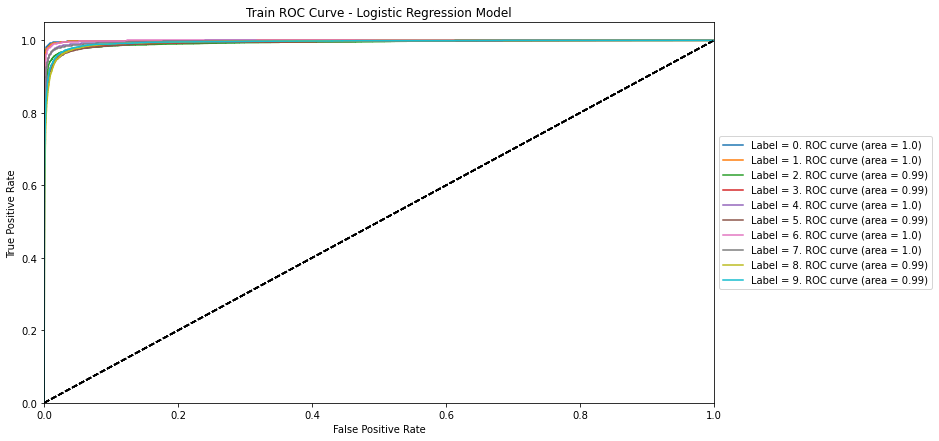

In [51]:

y_train_pred_prob = lr_model.predict_proba(X_train_scaled)
plot_roc_multiclass(y, y_train_pred_prob, "Logistic Regression Model", "Train")

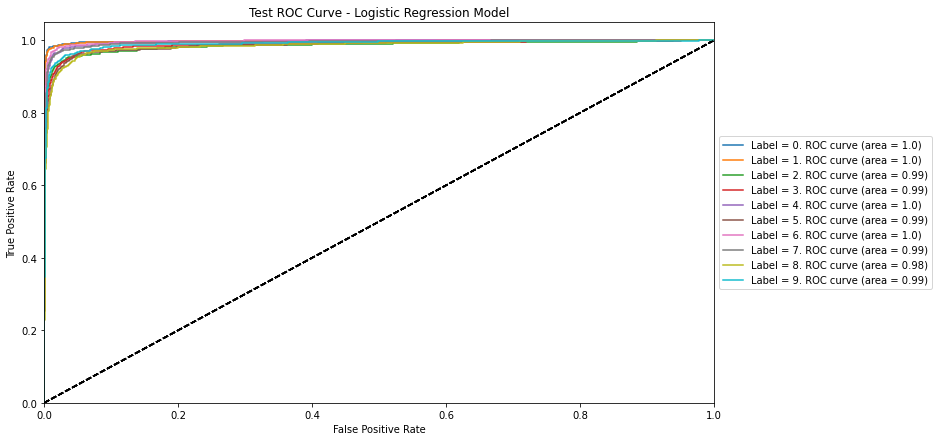

In [52]:

y_test_pred_prob = lr_model.predict_proba(X_test_scaled)
plot_roc_multiclass(ytest, y_test_pred_prob, "Logistic Regression Model", "Test")

The ROC for all the labels are approximately close to 1. The model has a good ROC for both the train and test data.

#### Model Evaluation

In [53]:
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

In [54]:
train_confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

In [55]:
### Overall Model Train Accuarcy
train_confusion_matrix.diagonal().sum()/ train_confusion_matrix.sum()

0.9410833333333334

In [56]:
### Overall Model Test Accuarcy
test_confusion_matrix.diagonal().sum()/ test_confusion_matrix.sum()

0.9202

In [57]:
### Training Accuracy for each class
pd.DataFrame(train_confusion_matrix.diagonal()/ train_confusion_matrix.sum(axis = 1))

,0
0,0.980236
1,0.979628
2,0.925784
3,0.915671
4,0.948293
5,0.906808
6,0.969062
7,0.946297
8,0.907275
9,0.923843


In [58]:
### Testing Accuracy for each class
pd.DataFrame(test_confusion_matrix.diagonal()/ test_confusion_matrix.sum(axis = 1))

,0
0,0.961343
1,0.974826
2,0.897622
3,0.892650
4,0.929360
5,0.872999
6,0.949011
7,0.941232
8,0.858617
9,0.913127


In [59]:
### Classification report on the train data.
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5920
           1       0.96      0.98      0.97      6725
           2       0.94      0.93      0.93      6023
           3       0.93      0.92      0.92      6107
           4       0.94      0.95      0.95      5918
           5       0.92      0.91      0.91      5376
           6       0.96      0.97      0.96      5915
           7       0.95      0.95      0.95      6238
           8       0.91      0.91      0.91      5856
           9       0.92      0.92      0.92      5922

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



#### Model Evaluation on the test Data

In [60]:
### Classification report for the test data
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       983
           1       0.94      0.97      0.96      1152
           2       0.91      0.90      0.90       967
           3       0.90      0.89      0.89      1034
           4       0.93      0.93      0.93       906
           5       0.88      0.87      0.88       937
           6       0.93      0.95      0.94       961
           7       0.93      0.94      0.94      1055
           8       0.90      0.86      0.88       969
           9       0.91      0.91      0.91      1036

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [61]:
### printing the confusion matrix for the train data
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

,0,1,2,3,4,5,6,7,8,9
0,5803,1,11,8,7,22,28,4,31,5
1,1,6588,25,15,7,20,4,13,44,8
2,25,37,5576,79,54,19,51,53,114,15
3,23,20,110,5592,8,161,13,38,99,43
4,10,22,26,8,5612,3,38,12,31,156
5,38,19,30,132,44,4875,72,20,114,32
6,29,15,25,3,28,63,5732,3,15,2
7,9,26,53,19,37,6,3,5903,11,171
8,28,102,55,117,24,111,33,13,5313,60
9,17,20,12,66,124,27,3,144,38,5471


In [62]:
### printing the confusion matrix for the test data
pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred))

,0,1,2,3,4,5,6,7,8,9
0,945,0,5,0,2,10,12,4,4,1
1,0,1123,5,6,1,5,0,4,6,2
2,4,15,868,13,8,7,17,11,20,4
3,1,8,25,923,1,30,4,12,16,14
4,3,2,3,3,842,4,11,6,6,26
5,5,11,4,37,9,818,16,2,27,8
6,6,5,12,1,8,14,912,1,2,0
7,1,3,21,2,8,6,0,993,0,21
8,6,21,10,35,4,33,8,8,832,12
9,5,9,3,10,25,3,0,26,9,946


<b>Summary:</b>
- The model obtained is good, as we are getting an AUC ~99% for all the values
    - True positive rate is high, and False positive rate is low for these models.
- The Training Accuarcy of the model is 94%, and the test accuracy is around 92%.
- No overfitting of the model is observed.
- It could be seen that the precision of the models lies in the range 91-94%. So out of the values that are predicted positive, 94% of the values are actually positive.
- The same could be observed for recall is ~93% on average. The number of false negatives in the model are low.
- The model seems to be doing a decent job of predicting all the values correctly

### Applying PCA:

As the number of features are really high and are multi-collinear, I am using PCA to perform dimensionality reduction.
- Using Scaled data to perform the PCA.
    - If the variables of the data are in different ranges, then large values would affect the formation of principal components.
    - Hence, scaling of the data is necessary.


In [63]:
### PCA 
pca = PCA(random_state = 42)
pca.fit(X_train_scaled)

PCA(random_state=42)

In [64]:
pca.components_

array([[-9.84409733e-05,  1.75429264e-05,  1.59429964e-04, ...,
         6.93144713e-04,  8.70787367e-04,  6.13265593e-04],
       [ 3.95930787e-04,  1.92859747e-04, -1.88742680e-04, ...,
         5.11946252e-03,  3.82766980e-03,  1.97630979e-03],
       [ 5.56991720e-04,  6.43156061e-04,  3.73212865e-04, ...,
        -1.67801599e-03, -1.27375675e-03, -5.61113506e-04],
       ...,
       [-0.00000000e+00, -2.46144168e-19,  2.35455361e-03, ...,
        -0.00000000e+00,  2.16840434e-18, -5.63785130e-18],
       [ 0.00000000e+00,  3.46067838e-19, -1.33786774e-02, ...,
         7.45931095e-17, -8.50014503e-17,  7.63278329e-17],
       [ 0.00000000e+00, -1.84314369e-18,  6.94241015e-02, ...,
         3.42607887e-17,  1.43114687e-17, -1.53956708e-17]])

In [65]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.05664238, 0.09716238, 0.1347508 , 0.16385682, 0.18916878,
       0.21115524, 0.23034142, 0.24784675, 0.26317577, 0.27714034,
       0.2906546 , 0.30276336, 0.31394151, 0.32493321, 0.33525116,
       0.34525953, 0.35463974, 0.36387044, 0.37279729, 0.38147713,
       0.38970935, 0.39774035, 0.40541625, 0.41287547, 0.4200591 ,
       0.42696185, 0.43377192, 0.44036983, 0.4466606 , 0.45278131,
       0.45880305, 0.46471493, 0.47039404, 0.47598192, 0.48153175,
       0.48690108, 0.4921768 , 0.4973807 , 0.50248812, 0.50730814,
       0.51209144, 0.5167714 , 0.52134326, 0.52585956, 0.53033729,
       0.53473311, 0.5391226 , 0.5434298 , 0.54767721, 0.55186196,
       0.55595809, 0.55998428, 0.56395619, 0.56789135, 0.57177434,
       0.57551934, 0.57923175, 0.58293921, 0.58655228, 0.59014356,
       0.59365904, 0.59712636, 0.60056418, 0.60399779, 0.6073675 ,
       0.61068792, 0.61398405, 0.61720255, 0.62037989, 0.62352319,
       0.62663016, 0.62972363, 0.63278869, 0.63581164, 0.63880

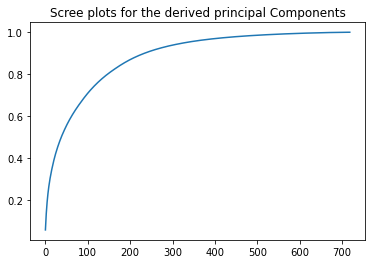

In [66]:
plt.plot(cumsum)
plt.title("Scree plots for the derived principal Components")
plt.show()

From the graph, it looks like approx 60% of the variance is explained by 100 components.<br>
80% of the variance is explained by 200 components.

#### Getting PCA Transformed Variables

Getting Principal components which explains 95% of the variance in the data

In [67]:
pca = PCA(0.95, random_state = 42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [68]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

In [69]:
X_train_pca.shape, X_test_pca.shape

((60000, 330), (10000, 330))

Checking if there is mulit-collinearity in principal components

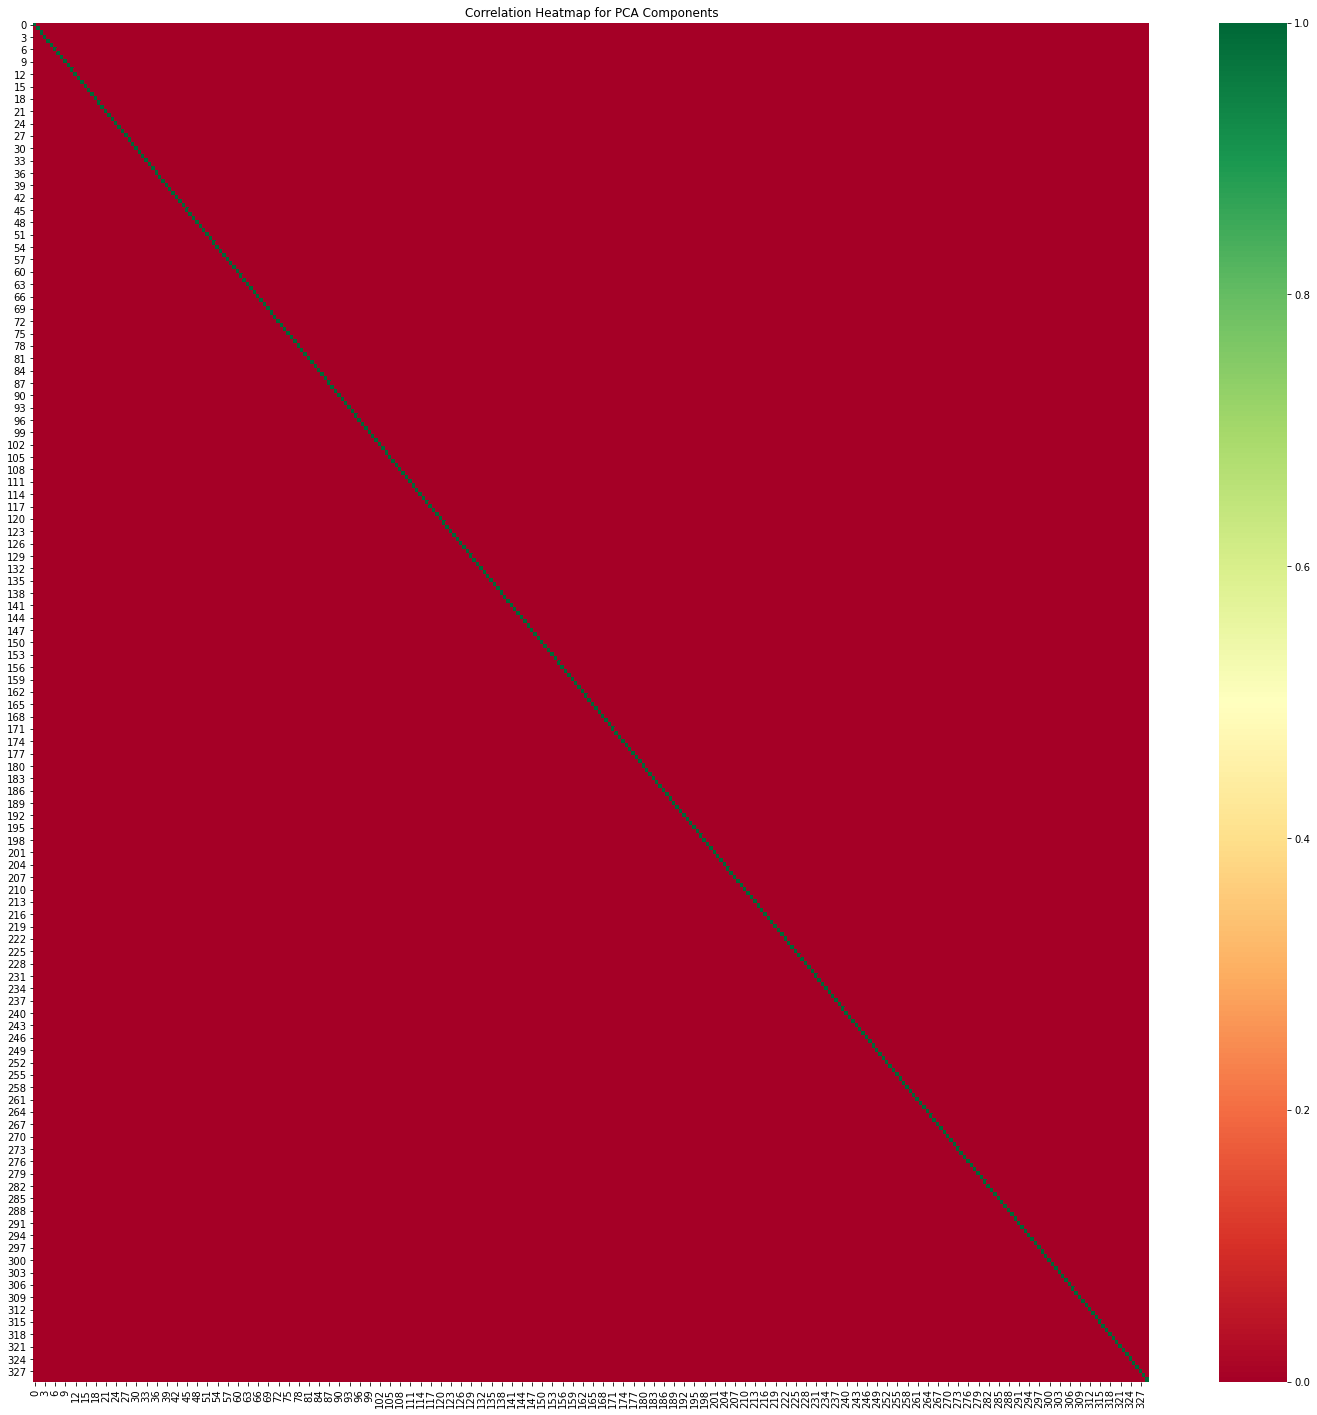

In [70]:
#### Applying HeatMap for PCA Components
plt.figure(figsize=(25,25))
sns.heatmap(X_train_pca.corr(), cmap = "RdYlGn")
plt.title("Correlation Heatmap for PCA Components")
plt.show()

From the graph, there does not seem to any linear relation between the variables.

### Applying Logistic model on Principal Components

In [71]:
lr_model_pca = LogisticRegression(random_state= 32, max_iter = 2000, penalty= "elasticnet", 
                              solver = "saga", l1_ratio= 0.2)
lr_model_pca.fit(X_train_pca, y_train)



LogisticRegression(l1_ratio=0.2, max_iter=2000, penalty='elasticnet',
                   random_state=32, solver='saga')

In [72]:
pd.DataFrame(lr_model.coef_)

,0,1,2,3,4,5,6,7,8,9,...,709,710,711,712,713,714,715,716,717,718
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000181,0.002173,0.004817,0.008890,0.014640,...,0.047441,0.043400,0.045244,0.036406,0.025463,0.017056,0.008891,0.002270,0.001387,0.000000
1,0.002469,0.005334,0.002111,0.002111,0.000000,0.003405,0.010583,0.015701,0.010348,0.025574,...,0.097166,0.104725,0.095211,0.064041,0.000352,0.034833,0.012869,0.006720,0.009047,0.001703
2,0.000000,0.000000,0.001011,0.001011,-0.010607,0.027506,0.035212,0.000000,-0.007585,-0.002268,...,-0.067304,-0.063480,-0.056901,-0.046770,-0.034971,-0.023032,-0.013920,-0.006818,-0.025062,0.000000
3,0.000000,-0.001116,0.000000,0.000000,0.000000,-0.001903,-0.005095,-0.008642,-0.013301,-0.019485,...,-0.076558,-0.070225,-0.076197,-0.056551,-0.040426,-0.027962,-0.017012,-0.007012,-0.008310,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.021003,-0.017766,0.000387,0.003904,...,-0.128798,-0.031281,-0.021534,0.002694,0.002193,-0.035442,-0.000296,0.000000,0.000000,0.000000
5,-0.000270,-0.002263,0.000000,0.000000,0.000000,-0.003248,-0.006840,-0.010846,-0.016298,-0.023528,...,-0.013157,-0.083352,-0.074739,-0.062627,-0.049598,-0.040120,-0.024513,-0.018423,-0.013316,-0.000284
6,0.002788,0.000000,-0.000415,-0.000415,0.015533,-0.020247,-0.000547,0.037471,0.038243,0.022435,...,0.040676,0.039689,0.036003,0.029069,0.019918,0.012011,0.006862,0.000620,0.000000,0.000000
7,0.000000,0.000086,0.000000,0.000000,0.000000,0.000424,0.002326,0.004777,0.008022,0.014278,...,0.126446,0.112725,0.060903,0.145290,0.026746,0.140225,0.007370,0.059159,-0.005881,0.037933
8,-0.004444,-0.007735,-0.003642,-0.003642,-0.003591,-0.009207,-0.014739,-0.021145,-0.030269,-0.042504,...,-0.139553,-0.132065,-0.119020,-0.098758,-0.075067,-0.053290,-0.033538,-0.016795,-0.013873,-0.003594
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.114127,0.080241,0.111301,-0.011298,0.124808,-0.011062,0.057820,-0.012423,0.061779,-0.029365


From this, we could see that the model co-efficients were changed to zero or made close to zero.

In [73]:
y_train_pred = lr_model_pca.predict(X_train_pca)
y_test_pred = lr_model_pca.predict(X_test_pca)

In [74]:
train_confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

#### Evaluating Goodness of the Fit

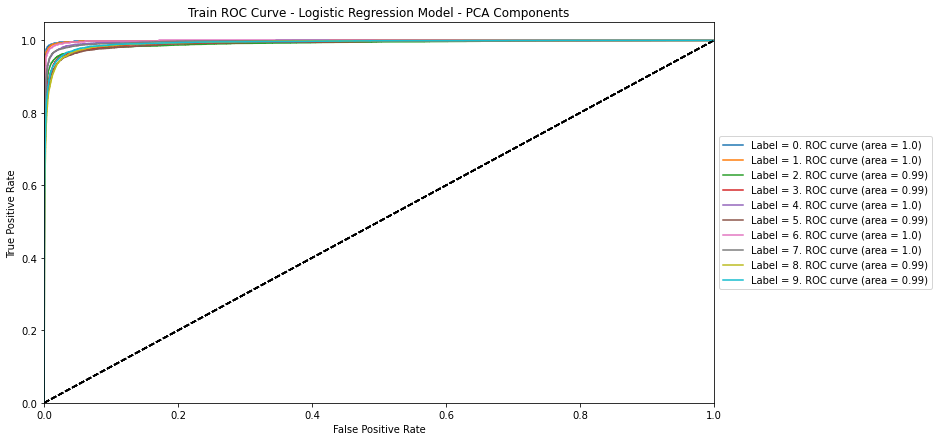

In [75]:

y_train_pred_prob = lr_model_pca.predict_proba(X_train_pca)
plot_roc_multiclass(y, y_train_pred_prob, "Logistic Regression Model - PCA Components", "Train")

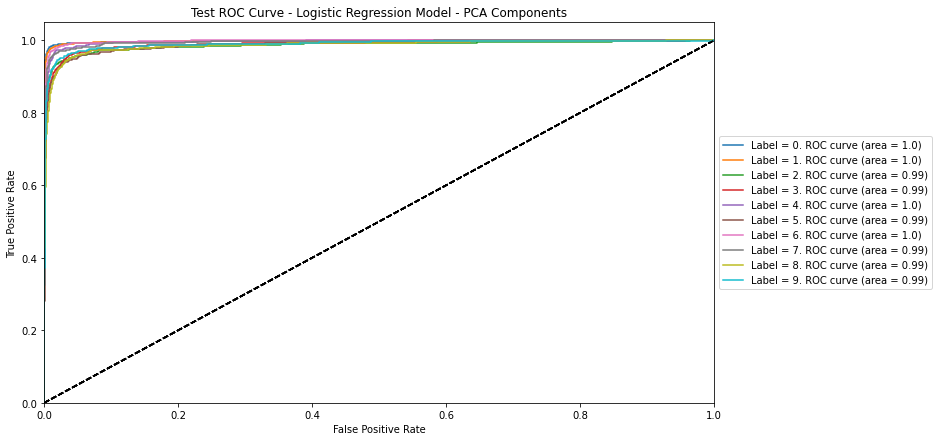

In [76]:

y_test_pred_prob = lr_model_pca.predict_proba(X_test_pca)
plot_roc_multiclass(ytest, y_test_pred_prob, "Logistic Regression Model - PCA Components", "Test")

#### Model Evaluation

In [77]:
### Overall Model Train Accuarcy
train_confusion_matrix.diagonal().sum()/ train_confusion_matrix.sum()

0.9334166666666667

In [78]:
test_confusion_matrix.diagonal().sum()/ test_confusion_matrix.sum()

0.922

In [79]:
### Accuarcy for each class
pd.DataFrame(train_confusion_matrix.diagonal()/ train_confusion_matrix.sum(axis = 1))

,0
0,0.976689
1,0.976208
2,0.918313
3,0.906173
4,0.942717
5,0.893601
6,0.965511
7,0.941007
8,0.893101
9,0.911685


In [80]:
### Testing Accuracy for each class
pd.DataFrame(test_confusion_matrix.diagonal()/ test_confusion_matrix.sum(axis = 1))

,0
0,0.965412
1,0.973958
2,0.902792
3,0.890716
4,0.931567
5,0.881537
6,0.954214
7,0.943128
8,0.864809
9,0.902510


In [81]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5920
           1       0.95      0.98      0.96      6725
           2       0.94      0.92      0.93      6023
           3       0.92      0.91      0.91      6107
           4       0.93      0.94      0.94      5918
           5       0.91      0.89      0.90      5376
           6       0.95      0.97      0.96      5915
           7       0.94      0.94      0.94      6238
           8       0.90      0.89      0.90      5856
           9       0.91      0.91      0.91      5922

    accuracy                           0.93     60000
   macro avg       0.93      0.93      0.93     60000
weighted avg       0.93      0.93      0.93     60000



In [82]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       983
           1       0.94      0.97      0.96      1152
           2       0.91      0.90      0.91       967
           3       0.90      0.89      0.90      1034
           4       0.92      0.93      0.93       906
           5       0.90      0.88      0.89       937
           6       0.94      0.95      0.94       961
           7       0.93      0.94      0.93      1055
           8       0.90      0.86      0.88       969
           9       0.91      0.90      0.91      1036

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [83]:
train_confusion_matrix

array([[5782,    1,    9,   14,   10,   27,   33,    4,   35,    5],
       [   1, 6565,   31,   16,    6,   25,    4,   12,   57,    8],
       [  31,   35, 5531,   79,   61,   20,   54,   67,  125,   20],
       [  20,   24,  125, 5534,    7,  184,   16,   45,  105,   47],
       [  10,   28,   35,    4, 5579,    3,   42,   16,   32,  169],
       [  47,   28,   34,  141,   54, 4804,   83,   20,  131,   34],
       [  31,   18,   28,    0,   35,   63, 5711,    3,   25,    1],
       [  12,   30,   54,   19,   46,    7,    3, 5870,   15,  182],
       [  32,  139,   52,  122,   31,  138,   34,   15, 5230,   63],
       [  24,   24,   15,   77,  145,   31,    3,  166,   38, 5399]])

In [84]:
test_confusion_matrix

array([[ 949,    0,    4,    0,    2,    9,   11,    3,    5,    0],
       [   0, 1122,    4,    6,    0,    3,    1,    5,    9,    2],
       [   3,   17,  873,    9,   11,    6,   16,   10,   18,    4],
       [   1,    9,   27,  921,    1,   28,    3,   14,   17,   13],
       [   2,    3,    4,    3,  844,    4,    9,    5,    4,   28],
       [   6,    9,    6,   34,    6,  826,   16,    2,   25,    7],
       [   5,    4,    8,    1,   10,   12,  917,    2,    2,    0],
       [   2,    5,   16,    4,    7,    3,    0,  995,    0,   23],
       [   8,   20,   11,   33,    5,   27,    7,    8,  838,   12],
       [   6,    8,    2,   12,   29,    4,    0,   30,   10,  935]])

<b>Summary:</b>
- The model seems have to less predictive power for differentiating 3,5 and 8.
- Overall training accuracy of the model is 93% and test accuracy is 92%.
- We could conclude that the model is able to generalize well on the data, and has a good training accuracy, precision and recall.

### Random forest model

In [85]:
random_forest = RandomForestClassifier(random_state= 42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

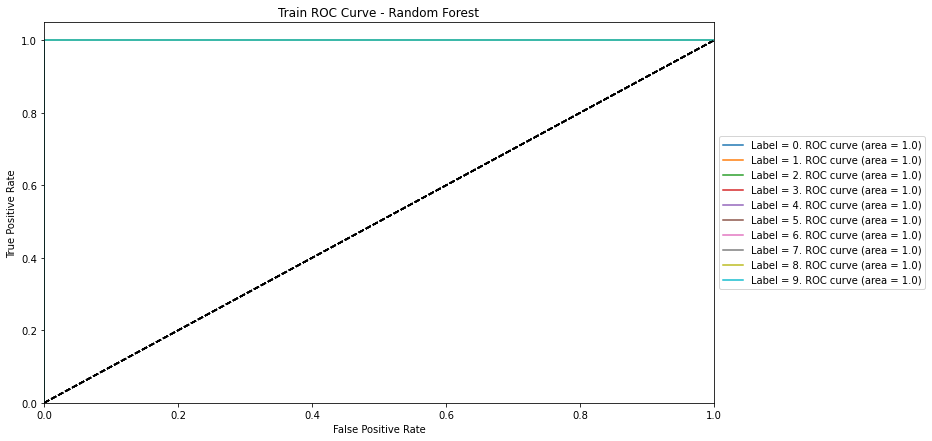

In [86]:

y_train_pred_prob = random_forest.predict_proba(X_train)
plot_roc_multiclass(y, y_train_pred_prob, "Random Forest", "Train")

In [111]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [112]:
train_confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

In [113]:
### Overall Model Train Accuarcy
train_confusion_matrix.diagonal().sum()/ train_confusion_matrix.sum()

1.0

In [114]:
test_confusion_matrix.diagonal().sum()/ test_confusion_matrix.sum()

0.9667

In [88]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5920
           1       1.00      1.00      1.00      6725
           2       1.00      1.00      1.00      6023
           3       1.00      1.00      1.00      6107
           4       1.00      1.00      1.00      5918
           5       1.00      1.00      1.00      5376
           6       1.00      1.00      1.00      5915
           7       1.00      1.00      1.00      6238
           8       1.00      1.00      1.00      5856
           9       1.00      1.00      1.00      5922

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [89]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       983
           1       0.98      0.99      0.98      1152
           2       0.95      0.97      0.96       967
           3       0.95      0.95      0.95      1034
           4       0.97      0.97      0.97       906
           5       0.97      0.96      0.97       937
           6       0.98      0.98      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.95      0.94      0.95       969
           9       0.96      0.95      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [90]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[5920,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6725,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 6023,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6107,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5918,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5376,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5915,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6238,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5856,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5922]])

In [91]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[ 969,    0,    4,    0,    1,    1,    2,    1,    5,    0],
       [   0, 1136,    5,    4,    1,    0,    0,    2,    2,    2],
       [   1,    3,  940,    1,    3,    1,    4,    6,    7,    1],
       [   1,    0,   18,  982,    0,    8,    2,    8,    6,    9],
       [   2,    0,    1,    0,  875,    0,    4,    3,    2,   19],
       [   1,    1,    1,   16,    2,  899,    4,    0,   11,    2],
       [   5,    1,    0,    0,    2,    7,  943,    0,    3,    0],
       [   1,    6,   12,    0,    5,    0,    0, 1023,    2,    6],
       [   0,    4,    8,   14,    5,    5,    5,    6,  915,    7],
       [   4,    5,    0,   13,   11,    2,    1,    8,    7,  985]])

The model seems to be overfitting on the train data. Hence, applying hyper paramater tuning to find the best parameters.

### Hyper parameter tuning

In [92]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 8)]
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(3, 20, num = 4)]
min_samples_split = [2, 5, 10,20,25]
min_samples_leaf = [12, 16,18, 20, 25]
Bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              "bootstrap": Bootstrap}


In [93]:
random_grid

{'n_estimators': [200, 314, 428, 542, 657, 771, 885, 1000],
 'max_features': ['sqrt'],
 'max_depth': [3, 8, 14, 20],
 'min_samples_split': [2, 5, 10, 20, 25],
 'min_samples_leaf': [12, 16, 18, 20, 25],
 'bootstrap': [True, False]}

In [94]:
rf = RandomForestClassifier(random_state = 42)


In [95]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)


In [96]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 8, 14, 20],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [12, 16, 18, 20,
                                                             25],
                                        'min_samples_split': [2, 5, 10, 20, 25],
                                        'n_estimators': [200, 314, 428, 542,
                                                         657, 771, 885, 1000]},
                   random_state=42, verbose=2)

In [97]:
best_model = rf_random.best_estimator_

In [98]:
best_model

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=20,
                       n_estimators=771, random_state=42)

In [99]:
rf_random.best_params_

{'n_estimators': 771,
 'min_samples_split': 20,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

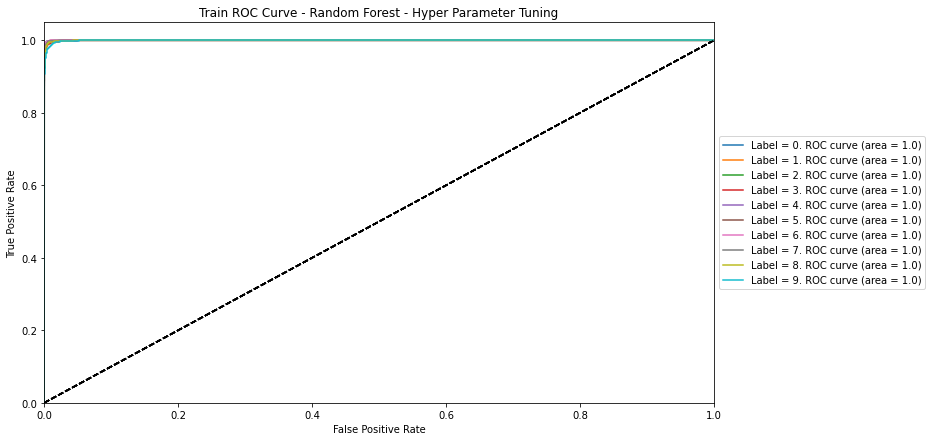

In [100]:
y_train_pred_prob = best_model.predict_proba(X_train)
plot_roc_multiclass(y, y_train_pred_prob, "Random Forest - Hyper Parameter Tuning", "Train")

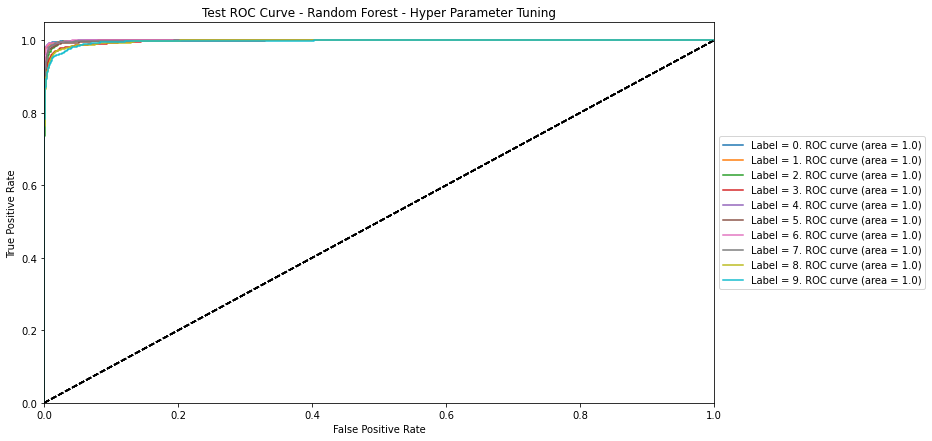

In [101]:
y_test_pred_prob = best_model.predict_proba(X_test)
plot_roc_multiclass(ytest, y_test_pred_prob, "Random Forest - Hyper Parameter Tuning", "Test")

In [115]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [116]:
train_confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

In [117]:
### Overall Model Train Accuarcy
train_confusion_matrix.diagonal().sum()/ train_confusion_matrix.sum()

0.9853166666666666

In [118]:
test_confusion_matrix.diagonal().sum()/ test_confusion_matrix.sum()

0.96

In [119]:
### Accuarcy for each class
pd.DataFrame(train_confusion_matrix.diagonal()/ train_confusion_matrix.sum(axis = 1))

,0
0,0.994088
1,0.990632
2,0.984891
3,0.978713
4,0.986820
5,0.986421
6,0.992899
7,0.984450
8,0.981387
9,0.972476


In [120]:
### Accuarcy for each class
pd.DataFrame(test_confusion_matrix.diagonal()/ test_confusion_matrix.sum(axis = 1))

,0
0,0.981689
1,0.981771
2,0.966908
3,0.941973
4,0.953642
5,0.956243
6,0.978148
7,0.961137
8,0.938080
9,0.938224


In [103]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5920
           1       0.99      0.99      0.99      6725
           2       0.98      0.98      0.98      6023
           3       0.98      0.98      0.98      6107
           4       0.99      0.99      0.99      5918
           5       0.99      0.99      0.99      5376
           6       0.99      0.99      0.99      5915
           7       0.98      0.98      0.98      6238
           8       0.98      0.98      0.98      5856
           9       0.98      0.97      0.98      5922

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



In [104]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.98      0.98      0.98      1152
           2       0.94      0.97      0.95       967
           3       0.95      0.94      0.95      1034
           4       0.96      0.95      0.95       906
           5       0.97      0.96      0.96       937
           6       0.97      0.98      0.98       961
           7       0.96      0.96      0.96      1055
           8       0.95      0.94      0.94       969
           9       0.94      0.94      0.94      1036

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [105]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[5885,    1,    0,    0,    2,    2,    7,    0,   21,    2],
       [   1, 6662,   25,    7,    7,    2,    6,   10,    4,    1],
       [  10,    4, 5932,   10,   15,    1,    7,   28,   14,    2],
       [   1,    2,   40, 5977,    0,   10,    3,   33,   28,   13],
       [   7,    4,    5,    0, 5840,    0,   18,    5,    5,   34],
       [   9,    5,    6,   11,    5, 5303,   20,    1,   12,    4],
       [  10,   11,    1,    0,    2,   13, 5873,    0,    5,    0],
       [   3,   14,   33,    2,   13,    0,    0, 6141,    5,   27],
       [  10,   15,    9,   11,    9,   14,    9,    4, 5747,   28],
       [  17,    8,    7,   51,   19,    9,    3,   29,   20, 5759]])

In [106]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[ 965,    0,    4,    0,    1,    1,    4,    1,    7,    0],
       [   0, 1131,    6,    6,    1,    1,    0,    4,    3,    0],
       [   3,    2,  935,    3,    5,    0,    6,    5,    7,    1],
       [   1,    1,   20,  974,    0,   10,    1,   11,    8,    8],
       [   1,    0,    2,    0,  864,    0,    5,    3,    2,   29],
       [   2,    2,    2,   13,    3,  896,    5,    0,   11,    3],
       [   5,    2,    0,    0,    4,    9,  940,    0,    1,    0],
       [   1,    6,   17,    0,    5,    0,    0, 1014,    4,    8],
       [   0,    6,    8,   15,    5,    9,    4,    4,  909,    9],
       [   5,    5,    2,   15,   16,    2,    1,   10,    8,  972]])

The model seems to be performing well on both the train and test data.


In [107]:
### getting the important features from the model.

In [108]:
feature_importances = pd.DataFrame({"features": X_train.columns, "Importances": best_model.feature_importances_ })
feature_importances

,features,Importances
0,pixel13,0.0
1,pixel14,0.0
2,pixel15,0.0
3,pixel16,0.0
4,pixel33,0.0
...,...,...
714,pixel776,0.0
715,pixel777,0.0
716,pixel778,0.0
717,pixel779,0.0


In [109]:
temp = feature_importances.sort_values(by = "Importances", ascending=False).head(20)
temp

,features,Importances
336,pixel379,0.010467
308,pixel351,0.010048
364,pixel407,0.008606
391,pixel434,0.008465
419,pixel462,0.008459
363,pixel406,0.008390
367,pixel410,0.008107
335,pixel378,0.008051
114,pixel156,0.007924
395,pixel438,0.007468


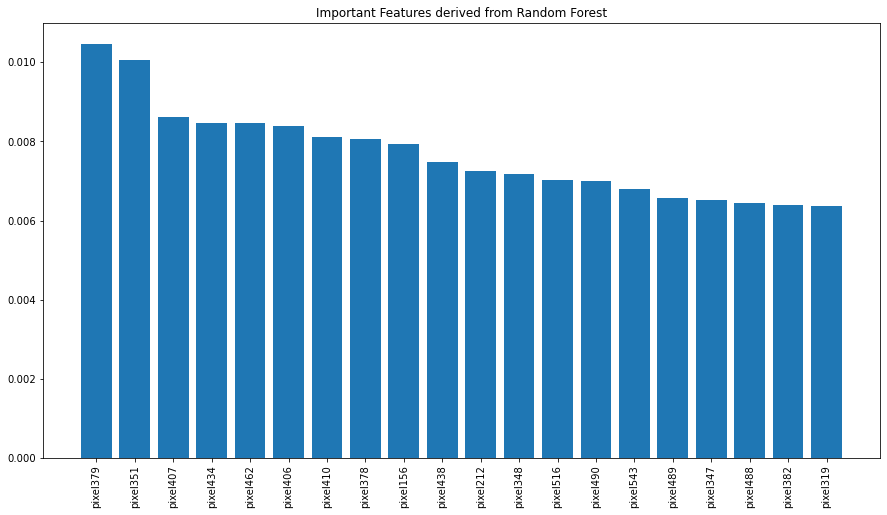

In [110]:
plt.figure(figsize= (15,8))
plt.bar(temp.features, temp.Importances)
plt.xticks(rotation = 90)
plt.title("Important Features derived from Random Forest")
plt.show()

### Conclusion: <br>
For this dataset, I have implemented the following algorithms 
- Logistic Regression - train 94% accuracy, test 92% accuracy.
- Logistic Regression on PCA Components - - train 93% accuracy, test 92% accuracy.
- Random Forest - - train 98% accuracy, test 97% accuracy.

From the above evaluation metrics, We could see all the models were able to generalise on both the train and test data sets.

we could conclude that the Random forest model on hyper parameters is giving a better accuracy compared to other models.


